In [2]:
from _element import feature_control as ft_c

In [33]:
from _element import calculations as calc

In [3]:
from _usecase import algorithm_prophet as prpt

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [8]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withobject.xlsx'

'C:\\Studying\\Project_Nextop\\nextop-engine\\nextop_engine'

In [9]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)

In [10]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [11]:
y_col= df_raw.columns.values.tolist()

In [16]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [17]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [18]:
x_col= df_temp.columns.values.tolist()

In [19]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [20]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [21]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [22]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [25]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

,ds,1041,1692,1815,1853,1878,temp_max,temp_min,rain_amount
0,2010-07-01,5698,9534,44580,5328,4003,30.500000,24.900000,0.0
1,2010-07-02,2740,7910,44920,6644,5629,25.799999,22.700001,70.0
2,2010-07-03,2742,4176,26213,5111,2706,25.600000,22.600000,1.0
3,2010-07-04,0,0,299,746,0,29.700001,23.100000,0.0
4,2010-07-05,3451,4844,39234,5927,2700,30.600000,21.799999,0.0


In [1]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

NameError: name 'y_col' is not defined

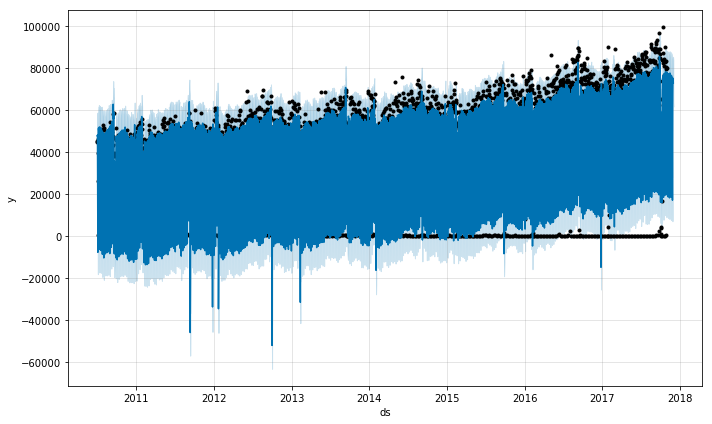

In [40]:
# result_dict[y]['model'].plot(result_dict[y]['forecastProphetTable'])

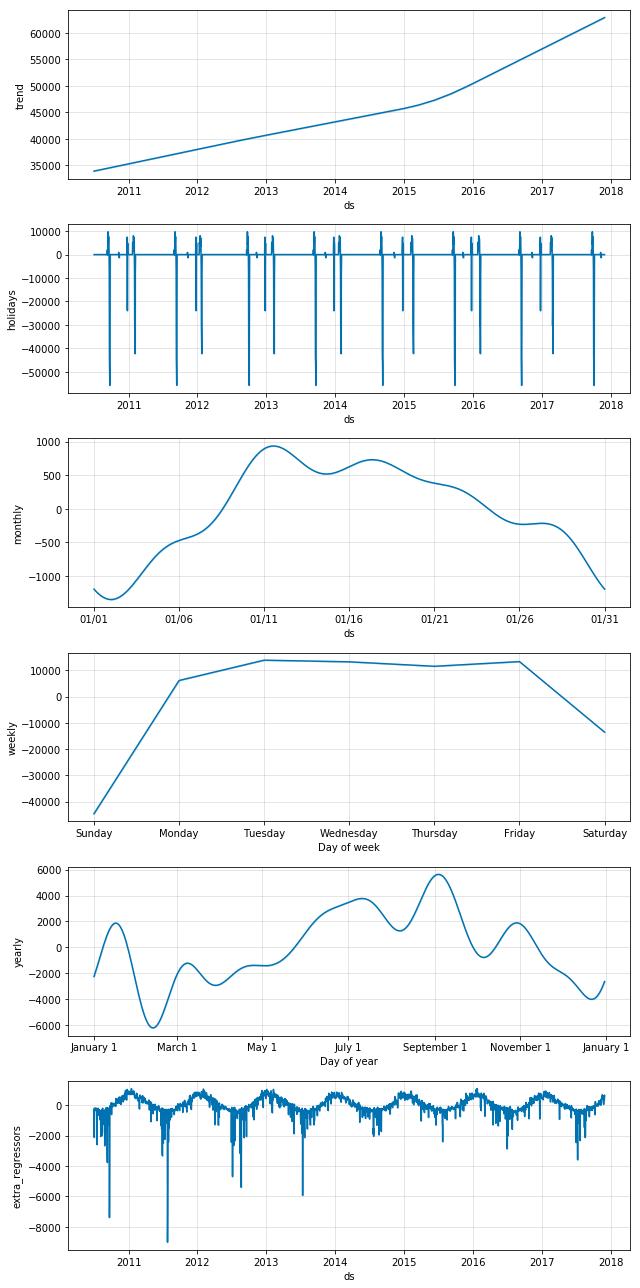

In [41]:
# result_dict[y]['model'].plot_components(result_dict[y]['forecastProphetTable'])